In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


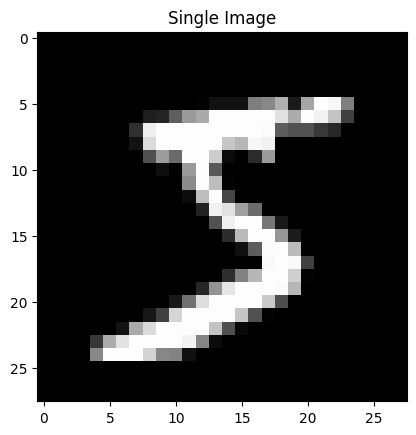

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explore the shape of the dataset
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Visualize a single image
single_image = X_train[0]
plt.imshow(single_image, cmap='gray')
plt.title("Single Image")
plt.show()


In [3]:
# Scale the images
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

# Convert labels to one-hot encoding
y_train_onehot = utils.to_categorical(y_train, 10)
y_test_onehot = utils.to_categorical(y_test, 10)

# Reshape the data to fit the model input
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)


In [4]:
# Define the CNN model
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,906 (1.33 MB)

 Trainable params: 348,906 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_onehot, epochs=5,
                    batch_size=64, validation_data=(X_test_scaled, y_test_onehot))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 44ms/step - accuracy: 0.8628 - loss: 0.4583 - val_accuracy: 0.9763 - val_loss: 0.0779
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9774 - loss: 0.0746 - val_accuracy: 0.9830 - val_loss: 0.0490
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9857 - loss: 0.0468 - val_accuracy: 0.9848 - val_loss: 0.0464
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9897 - loss: 0.0336 - val_accuracy: 0.9841 - val_loss: 0.0495
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9929 - loss: 0.0239 - val_accuracy: 0.9864 - val_loss: 0.0478


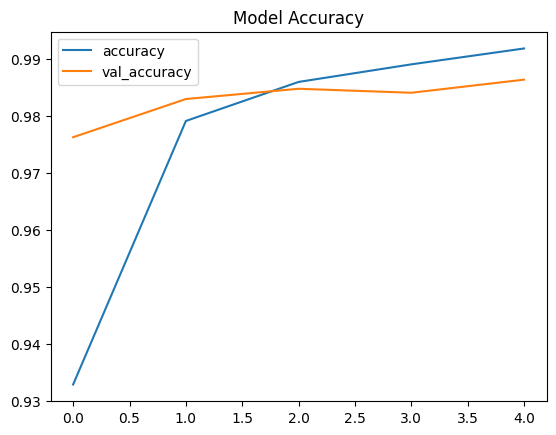

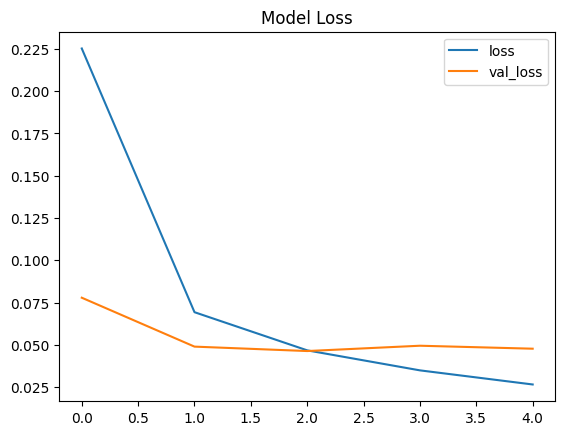

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[ 978    0    0    1    0    0    1    0    0    0]
 [   0 1133    0    0    1    0    1    0    0    0]
 [   3    6 1010    1    1    0    1    9    1    0]
 [   0    1    1  999    0    4    0    4    1    0]
 [   0    2    1    0  975    0    1    0    0    3]
 [   0    0    0    5    0  885    2    0    0    0]
 [   4    3    0    0    1    1  949    0    0    0]
 [   0    4    5    0    0    0    0 1018    1    0]
 [   5    1    4    3    4    6    4    1  944    2]
 [   0    4    0    3   15    2    0   11    1  973]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99      

In [6]:
# Convert the history to a DataFrame
metrics = pd.DataFrame(history.history)

# Plot accuracy and loss
metrics[['accuracy', 'val_accuracy']].plot()
plt.title("Model Accuracy")
plt.show()

metrics[['loss', 'val_loss']].plot()
plt.title("Model Loss")
plt.show()

# Make predictions on the test set
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

# Confusion matrix and classification report
print(confusion_matrix(y_test, x_test_predictions))
print(classification_report(y_test, x_test_predictions))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction for img:  [5]


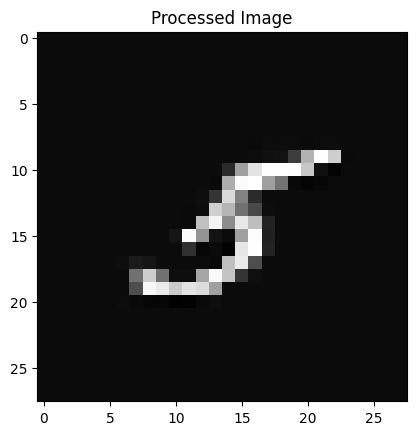

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Inverted prediction:  [8]


In [9]:
# Load and preprocess a new image
img = image.load_img('/content/five.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor, (28, 28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy() / 255.0

# Predict the class of the new image
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1, 28, 28, 1)),
    axis=1
)

print('Prediction for img: ', x_single_prediction)

# Visualize the new image
plt.imshow(img_28_gray_scaled.reshape(28, 28), cmap='gray')
plt.title("Processed Image")
plt.show()

# Invert the image colors and predict again
img_28_gray_inverted = 255.0 - img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy() / 255.0

x_single_prediction_inverted = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1, 28, 28, 1)),
    axis=1
)

print("Inverted prediction: ", x_single_prediction_inverted)
